In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Replace 'your_file_path.parquet' with the actual file path of your .parquet file
file_path = '/content/drive/MyDrive/SupplyChainProject/query_result_2000.993493Z.parquet'

# Read the .parquet file into a pandas DataFrame
df = pd.read_parquet(file_path,columns = ['title', 'paragraph', 'news_list', 'event_timestamp'],engine = 'auto')

# Display the DataFrame
print(df)


                                                  title  \
0     Will the Covid-19 Grinch cancel a Santa rally ...   
1     SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...   
2     Britain reports 10,000 new Omicron cases, ‘maj...   
3        Risk aversion sentiment continues to percolate   
4     Omicron rush on boosters may make it harder to...   
...                                                 ...   
1995  Covid cases rise in the US as Omicron now in o...   
1996  Factbox- banks tighten COVID-19 precautions as...   
1997  New SARS-CoV-2 variant a wake-up call for US, ...   
1998  Five new symptoms of Omicron - and how new var...   
1999  Watch now: County executive says omicron has c...   

                                              paragraph             news_list  \
0     OPINION: Stock markets typically trade higher ...   ["Supplier Market"]   
1     SPDR S&P Oil & Gas Exploration & Production ET...  ["Financial Health"]   
2     The total number of Omicron cases recorded

In [3]:
import pandas as pd
from IPython.display import display

# Replace 'your_file_path.parquet' with the actual file path of your .parquet file
file_path = '/content/drive/MyDrive/SupplyChainProject/query_result_2000.993493Z.parquet'

# Read the .parquet file into a pandas DataFrame
df = pd.read_parquet(file_path)

# Display the DataFrame using display()
display(df)


,title,paragraph,news_list,event_timestamp
0,Will the Covid-19 Grinch cancel a Santa rally ...,OPINION: Stock markets typically trade higher ...,"[""Supplier Market""]",2021-12-20T12:34:00Z
1,SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...,SPDR S&P Oil & Gas Exploration & Production ET...,"[""Financial Health""]",2021-12-20T12:31:00Z
2,"Britain reports 10,000 new Omicron cases, ‘maj...",The total number of Omicron cases recorded acr...,"[""Environmental""]",2021-12-20T12:31:00Z
3,Risk aversion sentiment continues to percolate,- Risk aversion sentiment on rapid spread of t...,"[""Commodities""]",2021-12-20T12:30:00Z
4,Omicron rush on boosters may make it harder to...,Countries are saying three vaccine doses are n...,"[""Commodities""]",2021-12-20T12:16:00Z
...,...,...,...,...
1995,Covid cases rise in the US as Omicron now in o...,Coronavirus infections are increasing in nearl...,"[""Financial Health""]",2021-12-14T01:37:00Z
1996,Factbox- banks tighten COVID-19 precautions as...,U.S. banks have been more proactive than other...,"[""Financial Health""]",2021-12-14T01:33:00Z
1997,"New SARS-CoV-2 variant a wake-up call for US, ...",A new variant of SARS-CoV-2 was first isolated...,"[""Commodities""]",2021-12-14T01:28:00Z
1998,Five new symptoms of Omicron - and how new var...,The NHS website still asks anyone with the thr...,"[""Environmental""]",2021-12-14T01:26:00Z


In [4]:
df.columns

Index(['title', 'paragraph', 'news_list', 'event_timestamp'], dtype='object')

In [5]:
df.shape

(2000, 4)

In [6]:
df.tail()

,title,paragraph,news_list,event_timestamp
1995,Covid cases rise in the US as Omicron now in o...,Coronavirus infections are increasing in nearl...,"[""Financial Health""]",2021-12-14T01:37:00Z
1996,Factbox- banks tighten COVID-19 precautions as...,U.S. banks have been more proactive than other...,"[""Financial Health""]",2021-12-14T01:33:00Z
1997,"New SARS-CoV-2 variant a wake-up call for US, ...",A new variant of SARS-CoV-2 was first isolated...,"[""Commodities""]",2021-12-14T01:28:00Z
1998,Five new symptoms of Omicron - and how new var...,The NHS website still asks anyone with the thr...,"[""Environmental""]",2021-12-14T01:26:00Z
1999,Watch now: County executive says omicron has c...,"St. Louis County Executive Sam Page on Monday,...","[""Commodities""]",2021-12-14T01:26:00Z


In [7]:
df.isnull().sum()

title              0
paragraph          0
news_list          0
event_timestamp    0
dtype: int64

In [8]:
df.head(2)

,title,paragraph,news_list,event_timestamp
0,Will the Covid-19 Grinch cancel a Santa rally ...,OPINION: Stock markets typically trade higher ...,"[""Supplier Market""]",2021-12-20T12:34:00Z
1,SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...,SPDR S&P Oil & Gas Exploration & Production ET...,"[""Financial Health""]",2021-12-20T12:31:00Z


In [9]:
df['news_list'].value_counts()

["Environmental"]       545
["Commodities"]         506
["Delays"]              365
["Financial Health"]    303
["Compliance"]          160
["Supplier Market"]     121
Name: news_list, dtype: int64

In [10]:
# Use the unique() method on the 'news_list' column, extract the content inside the brackets, and remove the quotes
unique_news_list = df['news_list'].str.strip('[]').str.replace('"', '').unique().tolist()

# Print the unique values as simple strings
print(unique_news_list)

['Supplier Market', 'Financial Health', 'Environmental', 'Commodities', 'Compliance', 'Delays']


In [11]:
# Sample DataFrame with the "news_list" column
df2 = pd.DataFrame(df['news_list'])


# Convert the list in "news_list" column to simple strings without quotes
# df2['news_list'] = df2['news_list'].apply(lambda x: ''.join(x)).str.strip("[]").str.replace("'", "")
df2['news_list'] = df2['news_list'].apply(lambda x: ''.join(x)).str.strip('[]"')

df2.rename(columns={'news_list': 'news_list1'}, inplace=True)
df2['news_list1'] = df2['news_list1'].str.lower()


# Print the DataFrame after updating the "news_list" column
df2

,news_list1
0,supplier market
1,financial health
2,environmental
3,commodities
4,commodities
...,...
1995,financial health
1996,financial health
1997,commodities
1998,environmental


In [12]:
# Concatenate df2 to df along axis=1 (columns)
df = pd.concat([df, df2['news_list1']], axis=1)


In [13]:
df.head()

,title,paragraph,news_list,event_timestamp,news_list1
0,Will the Covid-19 Grinch cancel a Santa rally ...,OPINION: Stock markets typically trade higher ...,"[""Supplier Market""]",2021-12-20T12:34:00Z,supplier market
1,SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...,SPDR S&P Oil & Gas Exploration & Production ET...,"[""Financial Health""]",2021-12-20T12:31:00Z,financial health
2,"Britain reports 10,000 new Omicron cases, ‘maj...",The total number of Omicron cases recorded acr...,"[""Environmental""]",2021-12-20T12:31:00Z,environmental
3,Risk aversion sentiment continues to percolate,- Risk aversion sentiment on rapid spread of t...,"[""Commodities""]",2021-12-20T12:30:00Z,commodities
4,Omicron rush on boosters may make it harder to...,Countries are saying three vaccine doses are n...,"[""Commodities""]",2021-12-20T12:16:00Z,commodities


In [14]:
random_sample = df.sample(n=10)
random_sample

,title,paragraph,news_list,event_timestamp,news_list1
1540,If you have these cold symptoms it is more lik...,The “majority of symptoms” of the Omicron vari...,"[""Environmental""]",2021-12-15T11:35:00Z,environmental
682,How the Omicron Variant and the End of the Sem...,As Cornell students returned from Thanksgiving...,"[""Delays""]",2021-12-18T02:58:00Z,delays
1424,Inflation: What Omicron could mean for prices ...,The spread of the Omicron variant could dent t...,"[""Supplier Market""]",2021-12-15T19:51:00Z,supplier market
1777,Most Gulf bourses rise ahead of cenbank meetings,Most stock markets in the Gulf reversed early ...,"[""Compliance""]",2021-12-14T18:42:00Z,compliance
565,Brazil's stock market down; dollar surpasses R...,Monetary tightening and concerns about the Omi...,"[""Compliance""]",2021-12-18T11:19:00Z,compliance
1234,EU summit to warn Russia of 'severe cost' over...,EU leaders gather in Brussels to discuss the O...,"[""Compliance""]",2021-12-16T09:56:00Z,compliance
800,City receives new coronavirus variant machine,With cases of omicron being reported in south ...,"[""Environmental""]",2021-12-17T19:20:00Z,environmental
685,Omicron coronavirus variant confirmed in 18 Io...,17 Iowa omicron cases were confirmed in the ei...,"[""Environmental""]",2021-12-18T02:48:00Z,environmental
1467,Cornell University moves finals online as omic...,Cornell University has moved final exams onlin...,"[""Environmental""]",2021-12-15T17:44:00Z,environmental
1889,Mumbai News Live: 2 new cases of Omicron takes...,"Mumbai Omicron News Latest Updates, Mumbai Lat...","[""Delays""]",2021-12-14T11:00:00Z,delays


In [15]:
df.drop(columns=['news_list'], inplace=True)


In [16]:
df.head()

,title,paragraph,event_timestamp,news_list1
0,Will the Covid-19 Grinch cancel a Santa rally ...,OPINION: Stock markets typically trade higher ...,2021-12-20T12:34:00Z,supplier market
1,SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...,SPDR S&P Oil & Gas Exploration & Production ET...,2021-12-20T12:31:00Z,financial health
2,"Britain reports 10,000 new Omicron cases, ‘maj...",The total number of Omicron cases recorded acr...,2021-12-20T12:31:00Z,environmental
3,Risk aversion sentiment continues to percolate,- Risk aversion sentiment on rapid spread of t...,2021-12-20T12:30:00Z,commodities
4,Omicron rush on boosters may make it harder to...,Countries are saying three vaccine doses are n...,2021-12-20T12:16:00Z,commodities


In [17]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])

In [18]:
df['year'] = df['event_timestamp'].dt.year
df['month'] = df['event_timestamp'].dt.month
df['day'] = df['event_timestamp'].dt.day
df['hour'] = df['event_timestamp'].dt.hour
df['minute'] = df['event_timestamp'].dt.minute


In [19]:
df.head()

,title,paragraph,event_timestamp,news_list1,year,month,day,hour,minute
0,Will the Covid-19 Grinch cancel a Santa rally ...,OPINION: Stock markets typically trade higher ...,2021-12-20 12:34:00+00:00,supplier market,2021,12,20,12,34
1,SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...,SPDR S&P Oil & Gas Exploration & Production ET...,2021-12-20 12:31:00+00:00,financial health,2021,12,20,12,31
2,"Britain reports 10,000 new Omicron cases, ‘maj...",The total number of Omicron cases recorded acr...,2021-12-20 12:31:00+00:00,environmental,2021,12,20,12,31
3,Risk aversion sentiment continues to percolate,- Risk aversion sentiment on rapid spread of t...,2021-12-20 12:30:00+00:00,commodities,2021,12,20,12,30
4,Omicron rush on boosters may make it harder to...,Countries are saying three vaccine doses are n...,2021-12-20 12:16:00+00:00,commodities,2021,12,20,12,16


In [20]:
df.drop(columns=['event_timestamp'], inplace=True)


In [21]:
year = df['year'].value_counts()
year

2021    2000
Name: year, dtype: int64

In [22]:
df.isnull().sum()

title         0
paragraph     0
news_list1    0
year          0
month         0
day           0
hour          0
minute        0
dtype: int64

In [23]:
df.head()

,title,paragraph,news_list1,year,month,day,hour,minute
0,Will the Covid-19 Grinch cancel a Santa rally ...,OPINION: Stock markets typically trade higher ...,supplier market,2021,12,20,12,34
1,SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...,SPDR S&P Oil & Gas Exploration & Production ET...,financial health,2021,12,20,12,31
2,"Britain reports 10,000 new Omicron cases, ‘maj...",The total number of Omicron cases recorded acr...,environmental,2021,12,20,12,31
3,Risk aversion sentiment continues to percolate,- Risk aversion sentiment on rapid spread of t...,commodities,2021,12,20,12,30
4,Omicron rush on boosters may make it harder to...,Countries are saying three vaccine doses are n...,commodities,2021,12,20,12,16


#Data Preprocessing

In [24]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [25]:
# Function for preprocessing text
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization or stemming (you can choose one based on your requirement)
    lemmatizer = nltk.WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back to form a preprocessed sentence
    preprocessed_text = ' '.join(lemmatized_tokens)

    return preprocessed_text

# Apply preprocessing to "title" column
df['transformed_title'] = df['title'].apply(preprocess_text)

# Apply preprocessing to "paragraph" column
df['transformed_para'] = df['paragraph'].apply(preprocess_text)



# Print the preprocessed DataFrame
df


,title,paragraph,news_list1,year,month,day,hour,minute,transformed_title,transformed_para
0,Will the Covid-19 Grinch cancel a Santa rally ...,OPINION: Stock markets typically trade higher ...,supplier market,2021,12,20,12,34,covid19 grinch cancel santa rally stock market,opinion stock market typically trade higher ti...
1,SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...,SPDR S&P Oil & Gas Exploration & Production ET...,financial health,2021,12,20,12,31,spdr sp xop etf multiyear uptrend buy dip,spdr sp oil gas exploration production etf xop...
2,"Britain reports 10,000 new Omicron cases, ‘maj...",The total number of Omicron cases recorded acr...,environmental,2021,12,20,12,31,britain report 10000 new omicron case ‘ major ...,total number omicron case recorded across coun...
3,Risk aversion sentiment continues to percolate,- Risk aversion sentiment on rapid spread of t...,commodities,2021,12,20,12,30,risk aversion sentiment continues percolate,risk aversion sentiment rapid spread omicron c...
4,Omicron rush on boosters may make it harder to...,Countries are saying three vaccine doses are n...,commodities,2021,12,20,12,16,omicron rush booster may make harder stop rise...,country saying three vaccine dos needed protec...
...,...,...,...,...,...,...,...,...,...,...
1995,Covid cases rise in the US as Omicron now in o...,Coronavirus infections are increasing in nearl...,financial health,2021,12,14,1,37,covid case rise u omicron half state video,coronavirus infection increasing nearly every ...
1996,Factbox- banks tighten COVID-19 precautions as...,U.S. banks have been more proactive than other...,financial health,2021,12,14,1,33,factbox bank tighten covid19 precaution omicro...,u bank proactive industry encouraging employee...
1997,"New SARS-CoV-2 variant a wake-up call for US, ...",A new variant of SARS-CoV-2 was first isolated...,commodities,2021,12,14,1,28,new sarscov2 variant wakeup call u industriali...,new variant sarscov2 first isolated characteri...
1998,Five new symptoms of Omicron - and how new var...,The NHS website still asks anyone with the thr...,environmental,2021,12,14,1,26,five new symptom omicron new variant differs o...,nh website still asks anyone three traditional...


In [26]:
df.head()

,title,paragraph,news_list1,year,month,day,hour,minute,transformed_title,transformed_para
0,Will the Covid-19 Grinch cancel a Santa rally ...,OPINION: Stock markets typically trade higher ...,supplier market,2021,12,20,12,34,covid19 grinch cancel santa rally stock market,opinion stock market typically trade higher ti...
1,SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...,SPDR S&P Oil & Gas Exploration & Production ET...,financial health,2021,12,20,12,31,spdr sp xop etf multiyear uptrend buy dip,spdr sp oil gas exploration production etf xop...
2,"Britain reports 10,000 new Omicron cases, ‘maj...",The total number of Omicron cases recorded acr...,environmental,2021,12,20,12,31,britain report 10000 new omicron case ‘ major ...,total number omicron case recorded across coun...
3,Risk aversion sentiment continues to percolate,- Risk aversion sentiment on rapid spread of t...,commodities,2021,12,20,12,30,risk aversion sentiment continues percolate,risk aversion sentiment rapid spread omicron c...
4,Omicron rush on boosters may make it harder to...,Countries are saying three vaccine doses are n...,commodities,2021,12,20,12,16,omicron rush booster may make harder stop rise...,country saying three vaccine dos needed protec...


In [27]:
value_counts = df['news_list1'].value_counts()
value_counts

environmental       545
commodities         506
delays              365
financial health    303
compliance          160
supplier market     121
Name: news_list1, dtype: int64

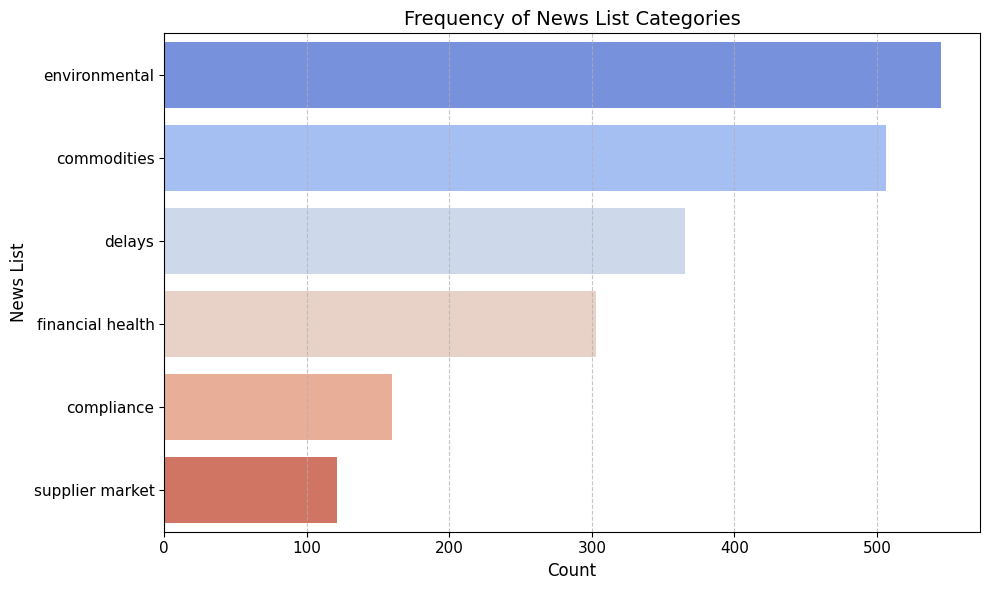

In [28]:
# Convert the value counts to a DataFrame
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['news_list1', 'count']
# Create a bar plot using Seaborn with custom styling
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='news_list1', data=value_counts_df, palette='coolwarm')
plt.xlabel('Count', fontsize=12)
plt.ylabel('News List', fontsize=12)
plt.title('Frequency of News List Categories', fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [29]:
# Supplier Market  -->   5
# Financial Health -->   0
# Environmental    -->   2
# Commodities      -->   1
# Compliance       -->   4
# Delays           -->   3

In [30]:
df['count_p'] = df['transformed_para'].apply(lambda x: len(x.split()))
df['count_t'] = df['transformed_title'].apply(lambda x: len(x.split()))
df.head()

,title,paragraph,news_list1,year,month,day,hour,minute,transformed_title,transformed_para,count_p,count_t
0,Will the Covid-19 Grinch cancel a Santa rally ...,OPINION: Stock markets typically trade higher ...,supplier market,2021,12,20,12,34,covid19 grinch cancel santa rally stock market,opinion stock market typically trade higher ti...,18,7
1,SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...,SPDR S&P Oil & Gas Exploration & Production ET...,financial health,2021,12,20,12,31,spdr sp xop etf multiyear uptrend buy dip,spdr sp oil gas exploration production etf xop...,19,8
2,"Britain reports 10,000 new Omicron cases, ‘maj...",The total number of Omicron cases recorded acr...,environmental,2021,12,20,12,31,britain report 10000 new omicron case ‘ major ...,total number omicron case recorded across coun...,18,13
3,Risk aversion sentiment continues to percolate,- Risk aversion sentiment on rapid spread of t...,commodities,2021,12,20,12,30,risk aversion sentiment continues percolate,risk aversion sentiment rapid spread omicron c...,14,5
4,Omicron rush on boosters may make it harder to...,Countries are saying three vaccine doses are n...,commodities,2021,12,20,12,16,omicron rush booster may make harder stop rise...,country saying three vaccine dos needed protec...,15,11


In [31]:
df['all_text'] = df['transformed_title'] + ' ' + df['transformed_para']
df['count_all_text'] = df['all_text'].apply(lambda x: len(x.split()))

df.head()

,title,paragraph,news_list1,year,month,day,hour,minute,transformed_title,transformed_para,count_p,count_t,all_text,count_all_text
0,Will the Covid-19 Grinch cancel a Santa rally ...,OPINION: Stock markets typically trade higher ...,supplier market,2021,12,20,12,34,covid19 grinch cancel santa rally stock market,opinion stock market typically trade higher ti...,18,7,covid19 grinch cancel santa rally stock market...,25
1,SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...,SPDR S&P Oil & Gas Exploration & Production ET...,financial health,2021,12,20,12,31,spdr sp xop etf multiyear uptrend buy dip,spdr sp oil gas exploration production etf xop...,19,8,spdr sp xop etf multiyear uptrend buy dip spdr...,27
2,"Britain reports 10,000 new Omicron cases, ‘maj...",The total number of Omicron cases recorded acr...,environmental,2021,12,20,12,31,britain report 10000 new omicron case ‘ major ...,total number omicron case recorded across coun...,18,13,britain report 10000 new omicron case ‘ major ...,31
3,Risk aversion sentiment continues to percolate,- Risk aversion sentiment on rapid spread of t...,commodities,2021,12,20,12,30,risk aversion sentiment continues percolate,risk aversion sentiment rapid spread omicron c...,14,5,risk aversion sentiment continues percolate ri...,19
4,Omicron rush on boosters may make it harder to...,Countries are saying three vaccine doses are n...,commodities,2021,12,20,12,16,omicron rush booster may make harder stop rise...,country saying three vaccine dos needed protec...,15,11,omicron rush booster may make harder stop rise...,26


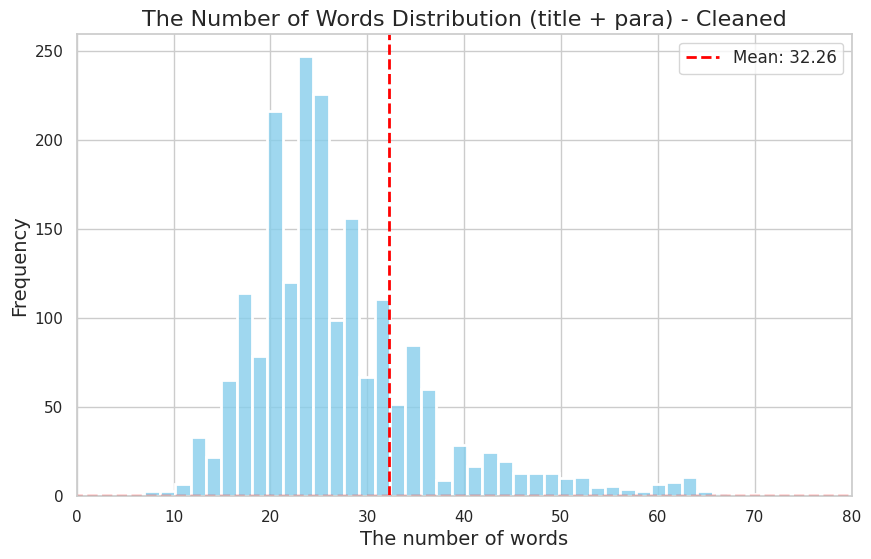

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure and set its size
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(df['count_all_text'], kde=False, color='skyblue', alpha=0.8, linewidth=2)

# Plot the KDE curve
sns.kdeplot(df['count_all_text'], color='red', linestyle='dashed', linewidth=2)

# Set the x-axis and y-axis labels and their font size
plt.xlabel('The number of words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set the title and its font size
plt.title('The Number of Words Distribution (title + para) - Cleaned', fontsize=16)

# Set the x-axis and y-axis limits
plt.xlim(0, 80)

# Add a vertical line at the mean value of the distribution
mean_count = df['count_all_text'].mean()
plt.axvline(x=mean_count, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_count:.2f}')

# Add a legend
plt.legend(loc='upper right', fontsize=12)

# Show the plot
plt.show()


In [33]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "news_list1" column to numerical labels
df['news_list1_label'] = label_encoder.fit_transform(df['news_list1'])

# Display the DataFrame with numerical labels
df

,title,paragraph,news_list1,year,month,day,hour,minute,transformed_title,transformed_para,count_p,count_t,all_text,count_all_text,news_list1_label
0,Will the Covid-19 Grinch cancel a Santa rally ...,OPINION: Stock markets typically trade higher ...,supplier market,2021,12,20,12,34,covid19 grinch cancel santa rally stock market,opinion stock market typically trade higher ti...,18,7,covid19 grinch cancel santa rally stock market...,25,5
1,SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...,SPDR S&P Oil & Gas Exploration & Production ET...,financial health,2021,12,20,12,31,spdr sp xop etf multiyear uptrend buy dip,spdr sp oil gas exploration production etf xop...,19,8,spdr sp xop etf multiyear uptrend buy dip spdr...,27,4
2,"Britain reports 10,000 new Omicron cases, ‘maj...",The total number of Omicron cases recorded acr...,environmental,2021,12,20,12,31,britain report 10000 new omicron case ‘ major ...,total number omicron case recorded across coun...,18,13,britain report 10000 new omicron case ‘ major ...,31,3
3,Risk aversion sentiment continues to percolate,- Risk aversion sentiment on rapid spread of t...,commodities,2021,12,20,12,30,risk aversion sentiment continues percolate,risk aversion sentiment rapid spread omicron c...,14,5,risk aversion sentiment continues percolate ri...,19,0
4,Omicron rush on boosters may make it harder to...,Countries are saying three vaccine doses are n...,commodities,2021,12,20,12,16,omicron rush booster may make harder stop rise...,country saying three vaccine dos needed protec...,15,11,omicron rush booster may make harder stop rise...,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Covid cases rise in the US as Omicron now in o...,Coronavirus infections are increasing in nearl...,financial health,2021,12,14,1,37,covid case rise u omicron half state video,coronavirus infection increasing nearly every ...,18,8,covid case rise u omicron half state video cor...,26,4
1996,Factbox- banks tighten COVID-19 precautions as...,U.S. banks have been more proactive than other...,financial health,2021,12,14,1,33,factbox bank tighten covid19 precaution omicro...,u bank proactive industry encouraging employee...,26,8,factbox bank tighten covid19 precaution omicro...,34,4
1997,"New SARS-CoV-2 variant a wake-up call for US, ...",A new variant of SARS-CoV-2 was first isolated...,commodities,2021,12,14,1,28,new sarscov2 variant wakeup call u industriali...,new variant sarscov2 first isolated characteri...,16,8,new sarscov2 variant wakeup call u industriali...,24,0
1998,Five new symptoms of Omicron - and how new var...,The NHS website still asks anyone with the thr...,environmental,2021,12,14,1,26,five new symptom omicron new variant differs o...,nh website still asks anyone three traditional...,18,9,five new symptom omicron new variant differs o...,27,3


In [34]:
# Create a mapping of numerical label to original category
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the DataFrame with numerical labels and category mapping
print("\nMapping of Numerical Label to Category:")
print(label_mapping)


Mapping of Numerical Label to Category:
{'commodities': 0, 'compliance': 1, 'delays': 2, 'environmental': 3, 'financial health': 4, 'supplier market': 5}


Supplier Market  -->   5 <br>
Financial Health -->   4 <br>
Environmental    -->   3 <br>
Compliance       -->   1 <br>
Delays           -->   2 <br>
Commodities      -->   0 <br>

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import os

# Function to create a word cloud for a given category and save it as an image
def create_and_save_wordcloud(category_text, category, save_folder):
    wordcloud = WordCloud(width=400, height=200, background_color='white', colormap='viridis').generate(category_text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    save_path = os.path.join(save_folder, f'{category}_wordcloud.png')
    plt.savefig(save_path, bbox_inches='tight')
    plt.close()

# Generate word clouds for each category and save them in the specified folder
save_folder = "/content/drive/MyDrive/SupplyChainProject"
for category in df['news_list1'].unique():
    # Combine text from both "title" and "paragraph" columns
    category_text = ' '.join(df[df['news_list1'] == category]['all_text'])
    create_and_save_wordcloud(category_text, category, save_folder)


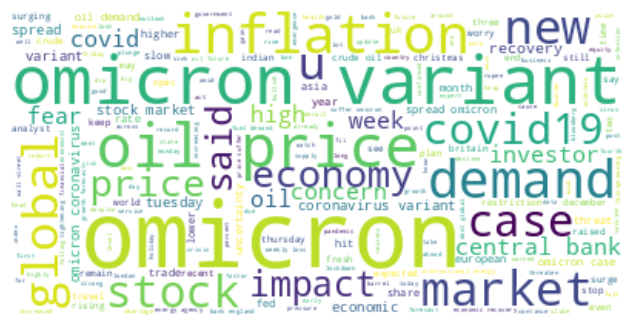

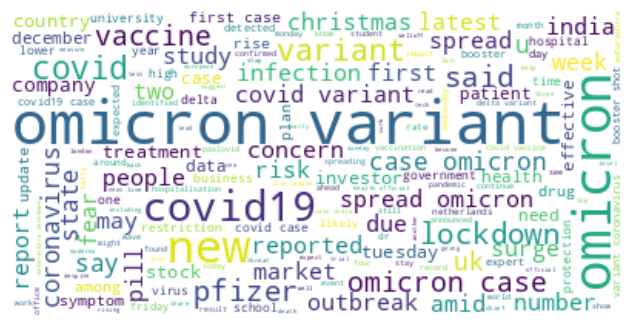

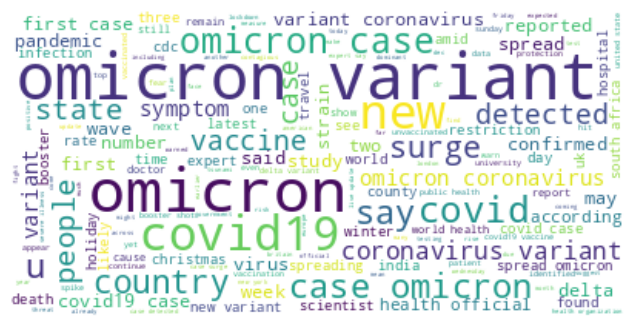

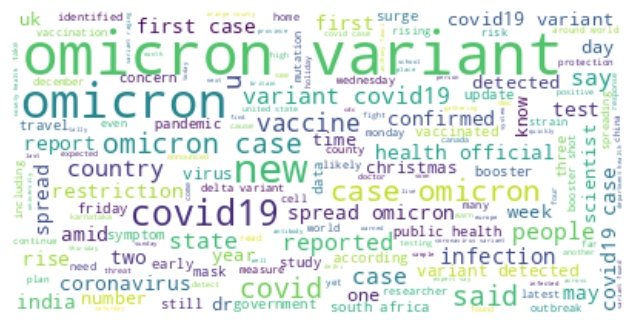

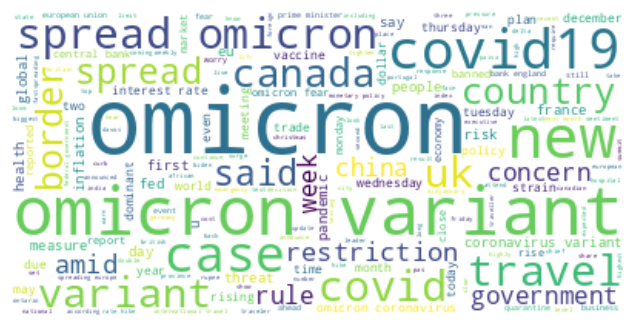

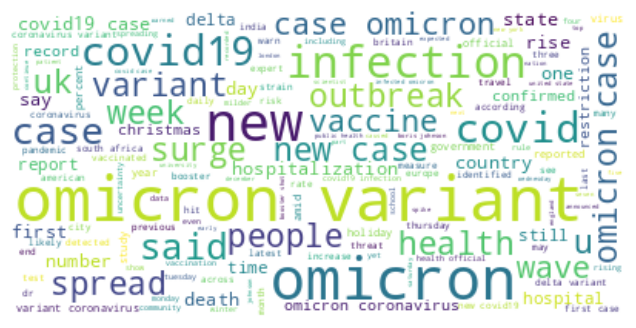

In [36]:
from IPython.display import display, HTML
import os

# Path to the folder containing the word cloud images
folder_path = "/content/drive/MyDrive/SupplyChainProject"

# List all files in the folder
file_list = os.listdir(folder_path)

# Display all word cloud images with category name
for file_name in file_list:
    if file_name.endswith('.png'):
        # Extract category name from the file name
        category = file_name.split('_')[0]

        # Create a line separator
        separator = '<hr style="border:2px solid #f1f1f1">'

        # Display the category name and image with separator
        display(HTML(f"<h3>{category}</h3>"))
        display(Image.open(os.path.join(folder_path, file_name)))
        display(HTML(separator))


#Textual to numerical

In [37]:
df.head()

,title,paragraph,news_list1,year,month,day,hour,minute,transformed_title,transformed_para,count_p,count_t,all_text,count_all_text,news_list1_label
0,Will the Covid-19 Grinch cancel a Santa rally ...,OPINION: Stock markets typically trade higher ...,supplier market,2021,12,20,12,34,covid19 grinch cancel santa rally stock market,opinion stock market typically trade higher ti...,18,7,covid19 grinch cancel santa rally stock market...,25,5
1,SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...,SPDR S&P Oil & Gas Exploration & Production ET...,financial health,2021,12,20,12,31,spdr sp xop etf multiyear uptrend buy dip,spdr sp oil gas exploration production etf xop...,19,8,spdr sp xop etf multiyear uptrend buy dip spdr...,27,4
2,"Britain reports 10,000 new Omicron cases, ‘maj...",The total number of Omicron cases recorded acr...,environmental,2021,12,20,12,31,britain report 10000 new omicron case ‘ major ...,total number omicron case recorded across coun...,18,13,britain report 10000 new omicron case ‘ major ...,31,3
3,Risk aversion sentiment continues to percolate,- Risk aversion sentiment on rapid spread of t...,commodities,2021,12,20,12,30,risk aversion sentiment continues percolate,risk aversion sentiment rapid spread omicron c...,14,5,risk aversion sentiment continues percolate ri...,19,0
4,Omicron rush on boosters may make it harder to...,Countries are saying three vaccine doses are n...,commodities,2021,12,20,12,16,omicron rush booster may make harder stop rise...,country saying three vaccine dos needed protec...,15,11,omicron rush booster may make harder stop rise...,26,0


In [38]:
from sklearn.model_selection import train_test_split


# Separate features (X) and labels (Y)
selected_columns = ["year", "month", "day", "hour", "minute", "all_text"]
X = df[selected_columns]
Y = df['news_list1_label']

# Split the data into 80% training and 20% test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [39]:
# Print the shape of the training and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (1600, 6)
X_test shape: (400, 6)
Y_train shape: (1600,)
Y_test shape: (400,)


In [40]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.model_selection import train_test_split

# # Load your DataFrame 'df' here containing columns: 'year', 'month', 'day', 'hour', 'minute', 'transformed_title', 'transformed_para', and 'news_list1_label'

# # Separate features (X) and labels (Y)
# X = df[['year', 'month', 'day', 'hour', 'minute', 'transformed_title', 'transformed_para']]
# Y = df['news_list1_label']

# # Convert text features to numerical vectors using TF-IDF vectorizer
# vectorizer = TfidfVectorizer()
# X_transformed_title = vectorizer.fit_transform(X['transformed_title'])
# X_transformed_para = vectorizer.transform(X['transformed_para'])

# # Combine the numerical features with the TF-IDF vectors
# X_numerical = X.drop(['transformed_title', 'transformed_para'], axis=1)
# X_numerical.columns = X_numerical.columns.astype(str)

# # Convert the TF-IDF vectors to DataFrames and reset their indices
# X_transformed_title_df = pd.DataFrame(X_transformed_title.toarray())
# X_transformed_para_df = pd.DataFrame(X_transformed_para.toarray())
# X_transformed_title_df.columns = X_transformed_title_df.columns.astype(str)
# X_transformed_para_df.columns = X_transformed_para_df.columns.astype(str)

# # Combine all features into a single DataFrame
# X_combined = pd.concat([X_numerical, X_transformed_title_df, X_transformed_para_df], axis=1)

# # Split the data into 80% training and 20% test sets
# X_train, X_test, Y_train, Y_test = train_test_split(X_combined, Y, test_size=0.2, random_state=42)

# # Initialize and train the Multinomial Naive Bayes classifier
# nb_classifier = MultinomialNB()
# nb_classifier.fit(X_train, Y_train)

# # Make predictions on the test set
# Y_pred = nb_classifier.predict(X_test)

# # Calculate and print accuracy
# accuracy = accuracy_score(Y_test, Y_pred)
# print("Accuracy:", accuracy)

# # Print classification report
# print("Classification Report:")
# print(classification_report(Y_test, Y_pred))


In [41]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report

# # Load your DataFrame 'df' containing columns: 'transformed_title', 'transformed_para', and 'news_list1_label'
# X = df[['transformed_title', 'transformed_para']]
# y = df['news_list1_label']

# # Split the data into train and test sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create TF-IDF vectorizer to convert text to numerical features
# vectorizer = TfidfVectorizer(max_features=5000)
# X_train_tfidf = vectorizer.fit_transform(X_train['transformed_title'] + " " + X_train['transformed_para'])
# X_test_tfidf = vectorizer.transform(X_test['transformed_title'] + " " + X_test['transformed_para'])

# # Calculate class weights
# class_weights = {cls: 1.0 / count for cls, count in zip(df['news_list1_label'].unique(), [545, 506, 365, 303, 160, 121])}

# # Initialize SVM classifier with class weights
# svm_classifier = SVC(kernel='linear', class_weight=class_weights)

# # Train the SVM model
# svm_classifier.fit(X_train_tfidf, y_train)

# # Make predictions on the test set
# y_pred = svm_classifier.predict(X_test_tfidf)

# # Calculate accuracy and print classification report
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


In [42]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report

# # Load your DataFrame 'df' here containing columns: 'title', 'paragraph', and 'news_list1_label'

# # Combine 'title' and 'paragraph' columns into a new 'text' column
# df['text'] = df['title'] + ' ' + df['paragraph']

# # Split the data into X and y
# X = df['text']
# y = df['news_list1_label']

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Vectorize the text data using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization
# vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features based on your data size
# X_train = vectorizer.fit_transform(X_train)
# X_test = vectorizer.transform(X_test)

# # Initialize the SVM classifier
# clf = SVC(kernel='linear', C=1.0)

# # Train the classifier on the training data
# clf.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = clf.predict(X_test)

# # Calculate accuracy and print classification report
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


In [43]:
# # Create separate corpora for each category
# corpora = {}
# for category in df['news_list1'].unique():
#     category_text = df[df['news_list1'] == category][['transformed_title', 'transformed_para']]
#     category_corpus = ' '.join(category_text['transformed_title'] + ' ' + category_text['transformed_para'])
#     corpora[category] = category_corpus

# # Print the corpora for each category
# for category, corpus in corpora.items():
#     print(f"Category: {category}")
#     print("Corpus:")
#     print(corpus)
#     print("\n")


In [44]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Create separate corpora for each category
# corpora = {}
# for category in df['news_list1'].unique():
#     category_text = df[df['news_list1'] == category][['transformed_title', 'transformed_para']]
#     category_corpus = ' '.join(category_text['transformed_title'] + ' ' + category_text['transformed_para'])
#     corpora[category] = category_corpus

# # Apply TF-IDF vectorization to each category's corpus
# vectorizers = {}
# for category, corpus in corpora.items():
#     vectorizer = TfidfVectorizer()
#     vectors = vectorizer.fit_transform([corpus])
#     vectorizers[category] = (vectorizer, vectors)

# # Print the numerical representations for each category
# for category, (vectorizer, vectors) in vectorizers.items():
#     print(f"Category: {category}")
#     print("Numerical Representation:")
#     print(vectors.toarray())
#     print("\n")


In [45]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score, classification_report

# # Assuming you have a labeled dataset with class labels (Y) and numerical representations (X)
# # Let's assume the dataset is named "X_data" and "y_labels"

# # Create lists to store results for each class
# accuracies = []
# classification_reports = []

# # Loop through each category and apply Naive Bayes classifier
# for category, (vectorizer, vectors) in vectorizers.items():
#     # Train the Naive Bayes classifier
#     nb_classifier = MultinomialNB()
#     nb_classifier.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_pred = nb_classifier.predict(X_test)

#     # Calculate accuracy and classification report
#     accuracy = accuracy_score(y_test, y_pred)
#     classification_report_str = classification_report(y_test, y_pred)

#     # Store the results for this class
#     accuracies.append(accuracy)
#     classification_reports.append(classification_report_str)

#     print(f"Category: {category}")
#     print("Accuracy:", accuracy)
#     print("Classification Report:")
#     print(classification_report_str)
#     print("\n")

# # Overall accuracy and average accuracy across classes
# overall_accuracy = sum(accuracies) / len(accuracies)
# print("Overall Accuracy:", overall_accuracy)


#Transformers

In [46]:
!pip install transformers
!pip install torch
!pip install sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [47]:
from sklearn.model_selection import train_test_split


# Separate features (X) and labels (Y)
selected_columns = ["year", "month", "day", "hour", "minute", "all_text"]
X = df[selected_columns]
Y = df['news_list1_label']

# Split the data into 80% training and 20% test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [48]:
X_train.head()

,year,month,day,hour,minute,all_text
968,2021,12,17,5,2,omicron widespread massachusetts told omicron ...
240,2021,12,19,19,5,market spooked tech stock selloff u hawkish ce...
819,2021,12,17,18,8,call mandatory vaccine manitoba personal care ...
692,2021,12,18,2,19,omicron help new covid19 infection bc soar bc ...
420,2021,12,19,2,2,covid 19 delta outbreak 55 new community case ...


In [49]:
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
from transformers import TextClassificationPipeline

import tensorflow as tf
import pandas as pd
import json
import gc

from sklearn.model_selection import train_test_split

import re

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot

from tqdm import tqdm

In [50]:
# from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizer
# import tensorflow as tf
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Load the DistilBERT tokenizer
# tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# # Assuming you have already loaded your dataset into X_train, Y_train, X_val, and Y_val
# # Extract text and labels
# X_train_text = X_train['all_text'].values.tolist()
# X_val_text = X_test['all_text'].values.tolist()
# Y_train_labels = Y_train.values.tolist()
# Y_val_labels = Y_test.values.tolist()

# # Make sure the 'all_text' column contains only strings
# X_train_text = [str(text) for text in X_train_text]
# X_val_text = [str(text) for text in X_val_text]

# # Tokenize the training and validation data
# train_encodings = tokenizer(X_train_text, truncation=True, padding=True, return_tensors='tf')
# val_encodings = tokenizer(X_val_text, truncation=True, padding=True, return_tensors='tf')

# # Convert the tokenized encodings into numpy arrays (TF's tokenizer returns TensorFlow tensors)
# train_input_ids = train_encodings['input_ids'].numpy()
# train_attention_masks = train_encodings['attention_mask'].numpy()
# val_input_ids = val_encodings['input_ids'].numpy()
# val_attention_masks = val_encodings['attention_mask'].numpy()

# # Convert the labels to numpy arrays
# train_labels = tf.constant(Y_train_labels)
# val_labels = tf.constant(Y_val_labels)

# # Create TensorFlow datasets
# train_dataset = tf.data.Dataset.from_tensor_slices((
#     {'input_ids': train_input_ids, 'attention_mask': train_attention_masks},
#     train_labels
# )).batch(16)  # Batch the dataset

# val_dataset = tf.data.Dataset.from_tensor_slices((
#     {'input_ids': val_input_ids, 'attention_mask': val_attention_masks},
#     val_labels
# )).batch(64)  # Batch the dataset

# # Define the model with 6 classes
# num_classes = 6
# model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_classes)

# # Compile the model
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
#               loss=model.compute_loss,  # Specify loss or loss function here
#               metrics=['accuracy'])  # Add additional metrics as needed


In [51]:

# # Train the model
# model.fit(train_dataset, epochs=7, validation_data=val_dataset, verbose=1)

# # Save the model
# model.save_pretrained('/content/drive/MyDrive/SupplyChainProject/saved_model/')


# trainer.evaluate()

In [52]:
# model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=5)

In [53]:
# from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments


In [54]:
# from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments
# import tensorflow as tf
# import pandas as pd

# # Load the DistilBERT tokenizer
# tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# # Assuming you have already loaded your dataset into df (DataFrame)

# # Extract text and labels
# X_train_text = df['all_text'].values.tolist()  # Convert 'all_text' column to a list
# Y_train_labels = df['news_list1'].values.tolist()  # Replace 'news_list1' with the actual column name for labels

# # Make sure the 'all_text' and 'news_list1' columns contain only strings
# X_train_text = [str(text) for text in X_train_text]
# Y_train_labels = [str(label) for label in Y_train_labels]

# # Assuming you have split the dataset into X_train, X_val, Y_train, Y_val

# # Extract text and labels for validation set
# X_val_text = X_val['all_text'].values.tolist()
# Y_val_labels = Y_val['news_list1'].values.tolist()

# # Make sure the 'all_text' column in validation set contains only strings
# X_val_text = [str(text) for text in X_val_text]
# Y_val_labels = [str(label) for label in Y_val_labels]

# # Tokenize the training and validation data
# train_encodings = tokenizer(X_train_text, truncation=True, padding=True, return_tensors='tf')
# val_encodings = tokenizer(X_val_text, truncation=True, padding=True, return_tensors='tf')

# # Convert the tokenized encodings into numpy arrays (TF's tokenizer returns TensorFlow tensors)
# train_input_ids = train_encodings['input_ids'].numpy()
# train_attention_masks = train_encodings['attention_mask'].numpy()
# val_input_ids = val_encodings['input_ids'].numpy()
# val_attention_masks = val_encodings['attention_mask'].numpy()

# # Convert the labels to numpy arrays
# train_labels = tf.constant(Y_train_labels)
# val_labels = tf.constant(Y_val_labels)

# # Create TensorFlow datasets
# train_dataset = tf.data.Dataset.from_tensor_slices((
#     {'input_ids': train_input_ids, 'attention_mask': train_attention_masks},
#     train_labels
# ))

# val_dataset = tf.data.Dataset.from_tensor_slices((
#     {'input_ids': val_input_ids, 'attention_mask': val_attention_masks},
#     val_labels
# ))

# # Define training arguments
# training_args = TFTrainingArguments(
#     output_dir='/content/drive/MyDrive/SupplyChainProject/results',  # Change to the desired output folder
#     num_train_epochs=7,
#     per_device_train_batch_size=16,
#     per_device_eval_batch_size=64,
#     warmup_steps=500,
#     weight_decay=1e-5,
#     logging_dir='/content/drive/MyDrive/SupplyChainProject/results/logs',  # Change to the desired log folder
#     evaluation_strategy="steps",  # Perform evaluation at the end of each `eval_steps`
#     eval_steps=100
# )

# # Initialize the model
# with training_args.strategy.scope():
#     trainer_model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=5)

# # Create the trainer
# trainer = TFTrainer(
#     model=trainer_model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=val_dataset,
# )

# # Train the model
# trainer.train()


In [55]:
# save_directory = "/saved_models"

# model.save_pretrained(save_directory)

# toknizer.save_pretrained(save_directory)

# Loading Pre-Trained Model

In [56]:
# tokenizer_fine_tuned = DistilBertTokenizer.from_pretrained(save_directory)

# model_fine_tuned = TFDistilBertForSequenceClassification.from_pretrained(save_directory)

In [57]:
# test_text = test_texts[0]

# test_text

In [58]:
# predict_input = tokenizer_fine_tuned.encode(
#     test_text,
#     truncation = True,
#     padding = True,
#     return_tensors = 'tf'
# )

# output = model_fine_tuned(predict_input)[0]

# prediction_value = tf.argmax(output, axis = 1).numpy()[0]

# prediction_value

In [59]:
# from sklearn.model_selection import train_test_split


# # Separate features (X) and labels (Y)
# selected_columns = ["year", "month", "day", "hour", "minute", "all_text"]
# X = df[selected_columns]
# Y = df['news_list1_label']

# # Split the data into 80% training and 20% test sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [60]:
# import pandas as pd
# import torch
# import torch.nn as nn
# from transformers import DistilBertTokenizer, DistilBertModel, AdamW
# from sklearn.model_selection import train_test_split
# from torch.utils.data import DataLoader, Dataset, TensorDataset

# # Load the dataset into X and Y
# # Assuming you have already loaded your dataset into the variables X and Y

# # Step 1: Data Preprocessing
# # Combine the 'all_text' columns into a single text column
# X['text'] = X['all_text'].apply(lambda x: ' '.join(str(item) for item in x))

# # Drop the 'all_text' column as it's no longer needed
# X = X.drop(columns=['all_text'])

# # Step 2: Train-Test Split
# train_size = 0.8
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1 - train_size, random_state=42)

# # Step 3: Load Pre-trained DistilBERT Model
# tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# # Step 4: Tokenization and Formatting
# def tokenize_text(text, max_length):
#     return tokenizer(text, truncation=True, padding='max_length', max_length=max_length, return_tensors='pt')

# max_length = 512  # You can adjust this based on your text length distribution

# # Batch the training data
# train_batch_size = 4
# num_train_batches = (len(X_train) - 1) // train_batch_size + 1
# train_tokens = [tokenize_text(X_train.iloc[i * train_batch_size: (i + 1) * train_batch_size]['text'].tolist(), max_length=max_length) for i in range(num_train_batches)]

# # Batch the testing data
# test_batch_size = 4
# num_test_batches = (len(X_test) - 1) // test_batch_size + 1
# test_tokens = [tokenize_text(X_test.iloc[i * test_batch_size: (i + 1) * test_batch_size]['text'].tolist(), max_length=max_length) for i in range(num_test_batches)]

# # Combine the numerical features and tokenized inputs for training and testing
# X_train_ids = torch.cat([train_token['input_ids'] for train_token in train_tokens], dim=0)
# X_train_attention_mask = torch.cat([train_token['attention_mask'] for train_token in train_tokens], dim=0)

# X_test_ids = torch.cat([test_token['input_ids'] for test_token in test_tokens], dim=0)
# X_test_attention_mask = torch.cat([test_token['attention_mask'] for test_token in test_tokens], dim=0)

# # Convert the numerical features to a tensor
# X_train_numerical = torch.tensor(X_train[['year', 'month', 'day', 'hour', 'minute']].values, dtype=torch.float32)
# X_test_numerical = torch.tensor(X_test[['year', 'month', 'day', 'hour', 'minute']].values, dtype=torch.float32)

# # Step 5: Prepare DataLoaders
# batch_size = 16

# train_dataset = TensorDataset(X_train_ids, X_train_attention_mask, X_train_numerical, torch.tensor(Y_train.values))
# train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# test_dataset = TensorDataset(X_test_ids, X_test_attention_mask, X_test_numerical, torch.tensor(Y_test.values))
# test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# # Step 6: Define the Classification Model
# class DistilBERTClassifier(nn.Module):
#     def __init__(self, num_classes):
#         super(DistilBERTClassifier, self).__init__()
#         self.distilbert = DistilBertModel.from_pretrained('distilbert-base-uncased')
#         self.dropout = nn.Dropout(0.3)
#         self.classifier = nn.Linear(self.distilbert.config.hidden_size + 5, num_classes)  # +5 for the 5 numerical features

#     def forward(self, input_ids, attention_mask, numerical_features):
#         distilbert_output = self.distilbert(input_ids=input_ids, attention_mask=attention_mask)[0]
#         pooled_output = distilbert_output[:, 0]
#         output = torch.cat((pooled_output, numerical_features), dim=1)
#         output = self.dropout(output)
#         return self.classifier(output)

# num_classes = 6  # Adjust based on the number of classes in Y
# classifier_model = DistilBERTClassifier(num_classes)

# # Step 7: Training
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# classifier_model.to(device)

# criterion = nn.CrossEntropyLoss()
# optimizer = AdamW(classifier_model.parameters(), lr=2e-5)

# num_epochs = 5
# for epoch in range(num_epochs):
#     classifier_model.train()
#     train_loss = 0.0
#     for batch in train_dataloader:
#         input_ids, attention_mask, numerical_features, labels = batch
#         input_ids, attention_mask, numerical_features, labels = input_ids.to(device), attention_mask.to(device), numerical_features.to(device), labels.to(device)

#         optimizer.zero_grad()
#         outputs = classifier_model(input_ids, attention_mask, numerical_features)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         train_loss += loss.item()

#     avg_train_loss = train_loss / len(train_dataloader)
#     print(f'Epoch {epoch + 1}/{num_epochs}: Train Loss: {avg_train_loss}')


# # Step 8: Evaluation
# classifier_model.eval()
# with torch.no_grad():
#     correct = 0
#     total = 0
#     for batch in test_dataloader:
#         input_ids, attention_mask, labels = batch
#         input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

#         outputs = classifier_model(input_ids, attention_mask, torch.tensor(X_test[['year', 'month', 'day', 'hour', 'minute']].values).to(device))
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

#     accuracy = correct / total
#     print(f'Test Accuracy: {accuracy}')


In [61]:
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertModel
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [68]:


# Load the pre-trained DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
distilbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

# Assuming you have your dataset in X and Y
# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Tokenize the "all_text" column of the train and test sets
train_text_tokens = tokenizer.batch_encode_plus(X_train['all_text'].tolist(), padding=True, truncation=True, return_tensors='tf')
test_text_tokens = tokenizer.batch_encode_plus(X_test['all_text'].tolist(), padding=True, truncation=True, return_tensors='tf')

# Convert non-textual features to numpy arrays and normalize/scale if necessary
X_train_numerical = X_train[['year', 'month', 'day', 'hour', 'minute']].values
X_test_numerical = X_test[['year', 'month', 'day', 'hour', 'minute']].values

# Define the model architecture that combines DistilBERT and numerical features
num_classes = 6  # Adjust based on the number of classes in Y

# DistilBERT model input
input_ids = tf.keras.layers.Input(shape=(train_text_tokens['input_ids'].shape[1],), dtype='int32')
attention_mask = tf.keras.layers.Input(shape=(train_text_tokens['attention_mask'].shape[1],), dtype='int32')

# Numerical features input
numerical_features = tf.keras.layers.Input(shape=(X_train_numerical.shape[1],), dtype='float32')

# DistilBERT model
distilbert_output = distilbert_model(input_ids, attention_mask=attention_mask)[0]
pooled_output = tf.keras.layers.GlobalAveragePooling1D()(distilbert_output)
combined_features = tf.keras.layers.concatenate([pooled_output, numerical_features])

# Additional Dense layers for classification
dense_layer = tf.keras.layers.Dense(256, activation='relu')(combined_features)
output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(dense_layer)

# Final model
model = tf.keras.Model(inputs=[input_ids, attention_mask, numerical_features], outputs=output_layer)

# Compile the model with an appropriate loss function and optimizer
optimizer = Adam(learning_rate=2e-5)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Convert Y_train and Y_test to numpy arrays for TensorFlow
Y_train = Y_train.values
Y_test = Y_test.values

# Train the model
num_epochs = 50
batch_size = 16

model.fit(
    [train_text_tokens['input_ids'], train_text_tokens['attention_mask'], X_train_numerical],
    Y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_data=([test_text_tokens['input_ids'], test_text_tokens['attention_mask'], X_test_numerical], Y_test)
)




Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Epoch 1/50
100/100 [==============================] - 126s 1s/step - loss: 65.7620 - accuracy: 0.1575 - val_loss: 37.6327 - val_accuracy: 0.2050
Epoch 2/50
100/100 [==============================] - 100s 1s/step - loss: 26.3541 - accuracy: 0.2119 - val_loss: 14.5136 - val_accuracy: 0.2625
Epoch 3/50
100/100 [==============================] - 101s 1s/step - loss: 11.0552 - accuracy: 0.2812 - val_loss: 6.3826 - val_accuracy: 0.3825
Epoch 4/50
100/100 [==============================] - 100s 1000ms/step - loss: 3.2174 - accuracy: 0.3794 - val_loss: 2.1238 - val_accuracy: 0.3725
Epoch 5/50
100/100 [==============================] - 100s 1s/step - loss: 1.2759 - accuracy: 0.5256 - val_loss: 1.3438 - val_accuracy: 0.4625
Epoch 6/50
100/100 [==============================] - 103s 1s/step - loss: 0.9075 - accuracy: 0.6556 - val_loss: 1.2613 - val_accuracy: 0.5500
Epoch 7/50
100/100 [==============================] - 102s 1s/step - loss: 0.5166 - accuracy: 0.8169 - val_loss: 1.6819 - val_accurac

In [73]:
from google.colab import files
import shutil

# Assuming you have already saved the model and tokenizer in 'distilbert_combined_model3' and 'distilbert_tokenizer3' directories

# Zip the 'distilbert_combined_model3' directory
shutil.make_archive('/content/distilbert_combined_model2', 'zip', '/content/distilbert_combined_model2')

# Zip the 'distilbert_tokenizer3' directory
shutil.make_archive('/content/distilbert_tokenizer2', 'zip', '/content/distilbert_tokenizer2')

# Download the ZIP files
files.download('/content/distilbert_combined_model2.zip')
files.download('/content/distilbert_tokenizer2.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:




model.save('/distilbert_combined_model3.pt')


In [72]:
# Assuming you have trained the model as shown in your code

# Save the model
# model.save('distilbert_combined_model2')  #train_acc = 99% , val_acc =  54.25%
model.save('/content/drive/MyDrive/SupplyChainProject/distilbert_combined_model3')  #train_acc = 99% , val_acc =  54.25%


# Optionally, you can also save the tokenizer to use later for inference
# tokenizer.save_pretrained('distilbert_tokenizer2')
tokenizer.save_pretrained('/content/drive/MyDrive/SupplyChainProject/distilbert_tokenizer3')

('/content/drive/MyDrive/SupplyChainProject/distilbert_tokenizer3/tokenizer_config.json',
 '/content/drive/MyDrive/SupplyChainProject/distilbert_tokenizer3/special_tokens_map.json',
 '/content/drive/MyDrive/SupplyChainProject/distilbert_tokenizer3/vocab.txt',
 '/content/drive/MyDrive/SupplyChainProject/distilbert_tokenizer3/added_tokens.json')